<a href="https://colab.research.google.com/github/Neiscafe/cadeiras-uninter/blob/main/codelabs/codelab-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Gauss-Seidel

Sistema utilizado:

2t + x + n = 39

0,3t + 2x + 0,25n = 13

t + x + 2n = 45

Equações utilizadas:

t = (-x - n + 39)/2

x = (-0,3t - 0,25n + 13)/2

n = (-t - x + 45)/2

Para o método de Gauss-Seidel, é necessário isolar cada variável do sistema de equações, para isso, deve ser verificado se o módulo do coeficiente da variável isolada é maior ou igual à soma dos módulos dos coeficientes restantes na equação.

In [ ]:
import numpy as np

def gauss_seidel(A, b, tolerancia=1e-5, max_iteracoes=100, x_inicial=None):
    """
    Resolve um sistema de equações lineares Ax = b usando o método iterativo de Gauss-Seidel.

    Args:
        A (np.array): Matriz de coeficientes (deve ser quadrada).
        b (np.array): Vetor de resultados.
        tolerancia (float): A precisão desejada para o critério de parada.
        max_iteracoes (int): Número máximo de iterações para evitar loops infinitos.
        x_inicial (np.array, optional): Chute inicial para a solução. Se None, começa com zeros.

    Returns:
        np.array: O vetor da solução x, ou None se a matriz não for quadrada.
    """
    # --- 1. Preparação e Verificações Iniciais ---
    n = len(b)
    A = A.astype(float)
    b = b.astype(float)

    if A.shape[0] != n or A.shape[1] != n:
        print("Erro: A matriz de coeficientes deve ser quadrada.")
        return None

    # Inicializa o vetor solução x
    x = np.zeros(n, dtype=float) if x_inicial is None else x_inicial.astype(float)

    # --- 2. Verificação de Convergência (Critério de Sassenfeld - Dominância Diagonal) ---
    # Embora não seja uma garantia 100%, a dominância diagonal é um forte indicador de convergência.
    for i in range(n):
        soma_off_diagonal = np.sum(np.abs(A[i, :])) - np.abs(A[i, i])
        if np.abs(A[i, i]) < soma_off_diagonal:
            print(f"Aviso: A matriz não é diagonalmente dominante na linha {i}.")
            print("O método pode não convergir.")
            break # Só precisa avisar uma vez

    print("--- Iniciando Método de Gauss-Seidel ---")
    print(f"Solução inicial x(0): {x}")
    print("-" * 40)

    # --- 3. Loop Iterativo Principal ---
    for k in range(max_iteracoes):
        x_anterior = x.copy()

        # Itera por cada equação para encontrar o novo valor de cada x_i
        for i in range(n):
            soma_ax = 0
            for j in range(n):
                if i != j:
                    soma_ax += A[i, j] * x[j]

            # A fórmula principal de Gauss-Seidel
            x[i] = (b[i] - soma_ax) / A[i, i]

        # --- 4. Critério de Parada ---
        # Calcula o erro relativo usando a norma do máximo (a maior diferença entre os vetores)
        erro = np.linalg.norm(x - x_anterior, ord=np.inf) / (np.linalg.norm(x, ord=np.inf) + 1e-8)

        print(f"Iteração {k+1}: x = {np.round(x, 6)}, Erro = {erro:.6f}")

        if erro < tolerancia:
            print(f"\nConvergência atingida após {k+1} iterações.")
            return x

    print(f"\nAviso: Número máximo de {max_iteracoes} iterações atingido sem convergência completa.")
    return x

# --- ÁREA DE INPUT PARA O EXERCÍCIO ---
# Use o sistema que já verificamos ser diagonalmente dominante:
# 15x1 + x2 + 2x3 = 13
# x1 + 8x2 + 2x3 = 10
# x1 + 2x2 + 3x3 = -4

# Matriz de coeficientes A
A_matriz = np.array([[15, 1, 2],
                     [1, 8, 2],
                     [1, 2, 3]])

# Vetor de resultados b
b_vetor = np.array([13, 10, -4])

# Defina a precisão desejada para o exercício
tolerancia_exercicio = 1e-2


# --- Execução do programa ---
solucao = gauss_seidel(A_matriz, b_vetor, tolerancia=tolerancia_exercicio)

if solucao is not None:
    print("\n--- Resultado Final do Exercício ---")
    print(f"A solução para o sistema é:")
    print(f"x1 = {solucao[0]:.6f}")
    print(f"x2 = {solucao[1]:.6f}")
    print(f"x3 = {solucao[2]:.6f}")

NameError: name 'x' is not defined

# APOL 1 Ex. 3

Utilizando o processo de Gauss-Seidel com precisão de 10-2 e realizando os cálculos com arredondamento na sexta casa decimal, que resultados são obtidos para o sistema:


x1+8x2+2x3=10


15x1+x2+2x3=13


x1+2x2+3x3=-4

Fórmulas:

13-15x1=x2+2x3  =>  x1 = (-x2-x3+13)/15

10-8x2 = x1+2x3  => x2 = (-x1-2x3+10)/8

-4-3x3 = x1+2x2  => x3 = (-x1-2x2+4)/3

In [ ]:
from numpy import linalg as la
import numpy as np
x1 = 0.0
x2 = 0.0
x3 = 0.0
k = 0

while(True):
  parada = False
  _x1 = (-1*x2-1*x3+13)/15
  _x2 = (-1*_x1-2*x3+10)/8
  _x3 = (-1*_x1-2*_x2+4)/3
  parada = _x1-x1<0.01 and _x2-x2<0.01 and _x3-x3<0.01
  if parada:
    break
  x1 = _x1
  x2 = _x2
  x3 = _x3
  k = k+1
print("t = ",x1)
print("x = ",x2)
print("n = ", x3)
print("k = ", k)


t =  0.7708657407407408
x =  1.0650653935185186
n =  0.36633449074074065
k =  3


# Regra de Cramer

In [ ]:
from numpy import matrix, linalg
import numpy as np

print("Solução pelo Método de Cramer")
mA = np.array([[8.165956, 5.000000], [2.000000, 6.647982]])
mB = np.array([[0.000011], [0.020761]])
print(mA)
print(mB)


mT = np.copy(mA);
mT[0][0] = mB[0][0]
mT[1][0] = mB[1][0]
# mT[2][0] = mB[2][0]

print(mT)

mX = np.copy(mA);
mX[0][1] = mB[0][0]
mX[1][1] = mB[1][0]
# mX[2][1] = mB[2][0]
print(mX)
# mZ = np.copy(mA);
# mZ[0][2] = mB[0][0]
# mZ[1][2] = mB[1][0]
# mZ[2][2] = mB[2][0]
# print(mZ)
detA = np.linalg.det(mA)
detT = np.linalg.det(mT)
detX = np.linalg.det(mX)
# detZ = np.linalg.det(mZ)

s1 = detT/detA
s2 = detX/detA
# s3 = detZ/detA
print(fr"{s1} | {s2} ")


Solução pelo Método de Cramer
[[8.165956 5.      ]
 [2.       6.647982]]
[[1.1000e-05]
 [2.0761e-02]]
[[1.100000e-05 5.000000e+00]
 [2.076100e-02 6.647982e+00]]
[[8.165956e+00 1.100000e-05]
 [2.000000e+00 2.076100e-02]]
-0.0023422578006190883 | 0.0038275548281024503 


# Algoritmo que resolve sistemas de equação não-linear por Newton

In [ ]:
import numpy as np

def F(x):
    """
    Define o sistema de equações não-lineares na forma F(X) = 0.

    Args:
        x (np.array): Vetor de entrada [x1, x2].

    Returns:
        np.array: Vetor com o resultado das funções [f1, f2].
    """
    x1 = x[0]
    x2 = x[1]


    # AJUSTAR AQUI


    f1 = 3.0 * x1**2 + 5.0 * x2 - 13.0


    # AJUSTAR AQUI


    f2 = 2.0 * x1 + x2**3 - 6.0

    return np.array([f1, f2])

def J(x):
    """
    Define a Matriz Jacobiana do sistema F(X).

    Args:
        x (np.array): Vetor de entrada [x1, x2].

    Returns:
        np.array: Matriz Jacobiana 2x2.
    """


# AJUSTAR AQUI


    x1 = x[0]
    x2 = x[1]

    # J = [[df1/dx1, df1/dx2],
    #      [df2/dx1, df2/dx2]]
    return np.array([[6.0 * x1, 5.0],
                       [2.0, 3.0 * x2**2]])

def newton_system_solver(F, J, x0, tol, max_iter=50):
    """
    Resolve um sistema de equações não-lineares usando o método de Newton.

    Args:
        F (function): Função que define o sistema.
        J (function): Função que define a Matriz Jacobiana.
        x0 (np.array): Chute inicial.
        tol (float): Tolerância (precisão) para o critério de parada.
        max_iter (int): Número máximo de iterações.

    Returns:
        tuple: A solução (np.array) e o número de iterações.
    """
    x = np.array(x0, dtype=float) # Garante que estamos usando floats

    print("--- Iniciando Método de Newton ---")
    print(f"Chute Inicial x(0): {x}")
    print(f"Tolerância: {tol}\n")

    for k in range(max_iter):

        F_val = F(x)
        J_val = J(x)

        try:
            delta_x = np.linalg.solve(J_val, -F_val)
        except np.linalg.LinAlgError:
            print("Erro: Matriz Jacobiana singular. Não é possível continuar.")
            return None, k


        x = x + delta_x

        # Passo 4: Checar o critério de parada (erro relativo)
        # Usamos a norma do máximo, como no cálculo manual
        error = np.max(np.abs(delta_x) / (np.abs(x) + 1e-10)) # 1e-10 evita divisão por zero

        print(f"--- Iteração {k+1} ---")
        print(f"Vetor F(x): {F_val}")
        print(f"Correção delta_x: {delta_x}")
        print(f"Nova solução x({k+1}): {x}")
        print(f"Erro relativo: {error:.6f}\n")

        if error < tol:
            print(f"Convergência atingida após {k+1} iterações.")
            return x, k + 1

    print("Aviso: Número máximo de iterações atingido sem convergência.")
    return x, max_iter



# AJUSTAR AQUI


chute_inicial = [0.0, 0.0]
tolerancia = 1e-2

solucao, iteracoes = newton_system_solver(F, J, chute_inicial, tolerancia)

if solucao is not None:
    print("\n--- Resultado Final ---")

# AJUSTAR AQUI

    print(f"A solução para o sistema é x1 = {solucao[0]:.6f} e x2 = {solucao[1]:.6f}")
    print(f"Obtida em {iteracoes} iterações.")

--- Iniciando Método de Newton ---
Chute Inicial x(0): [0. 0.]
Tolerância: 0.01

--- Iteração 1 ---
Vetor F(x): [-13.  -6.]
Correção delta_x: [3.  2.6]
Nova solução x(1): [3.  2.6]
Erro relativo: 1.000000

--- Iteração 2 ---
Vetor F(x): [27.    17.576]
Correção delta_x: [-1.29472735 -0.73898152]
Nova solução x(2): [1.70527265 1.86101848]
Erro relativo: 0.759249

--- Iteração 3 ---
Vetor F(x): [5.02895677 3.85597765]
Correção delta_x: [-0.34235658 -0.30521779]
Nova solução x(3): [1.36291607 1.55580069]
Erro relativo: 0.251194

--- Iteração 4 ---
Vetor F(x): [0.35162408 0.49167226]
Correção delta_x: [-0.00192327 -0.06717931]
Nova solução x(4): [1.3609928  1.48862138]
Erro relativo: 0.045129

--- Iteração 5 ---
Vetor F(x): [1.10969132e-05 2.07610781e-02]
Correção delta_x: [ 0.00234225 -0.00382757]
Nova solução x(5): [1.36333505 1.48479382]
Erro relativo: 0.002578

Convergência atingida após 5 iterações.

--- Resultado Final ---
A solução para o sistema é x1 = 1.363335 e x2 = 1.484794
Obti

# Eliminação de Gauss

In [ ]:
import numpy as np

def eliminacao_gauss(A, b):
    """
    Resolve um sistema de equações lineares Ax = b usando o método de
    Eliminação de Gauss com pivoteamento parcial.

    Args:
        A (np.array): Matriz de coeficientes (quadrada).
        b (np.array): Vetor de resultados.

    Returns:
        np.array: Vetor da solução x, ou None se o sistema não tiver solução única.
    """
    n = len(b)
    # Garante que as matrizes usem ponto flutuante para as divisões
    A = A.astype(float)
    b = b.astype(float)

    # Construção da matriz aumentada [A|b]
    M = np.hstack([A, b.reshape(-1, 1)])

    print("--- Matriz Aumentada Inicial ---")
    print(M)
    print("-" * 30)

    # --- Fase 1: Eliminação Progressiva (com Pivoteamento Parcial) ---
    for j in range(n):
        # Pivoteamento: encontrar a linha com o maior pivô
        max_row_index = np.argmax(np.abs(M[j:, j])) + j

        # Trocar a linha atual (j) com a linha do maior pivô
        if max_row_index != j:
            M[[j, max_row_index]] = M[[max_row_index, j]]
            print(f"\n(Pivoteamento) Trocou linha {j+1} com {max_row_index+1}")
            print(M)

        # Verificar se o pivô é zero (sistema singular ou com múltiplas soluções)
        if M[j, j] == 0:
            print("Erro: O sistema não tem solução única (pivô nulo).")
            return None

        # Eliminação: zerar os elementos abaixo do pivô
        for i in range(j + 1, n):
            fator = M[i, j] / M[j, j]
            M[i, j:] = M[i, j:] - fator * M[j, j:]

        print(f"\n--- Após zerar a coluna {j+1} ---")
        print(M)

    # --- Fase 2: Substituição Regressiva ---
    x = np.zeros(n)

    # Resolve para a última variável primeiro
    x[n-1] = M[n-1, n] / M[n-1, n-1]

    # Itera de baixo para cima para encontrar as outras variáveis
    for i in range(n - 2, -1, -1):
        soma_ax = np.dot(M[i, i+1:n], x[i+1:n])
        x[i] = (M[i, n] - soma_ax) / M[i, i]

    return x

# --- Exemplo de Uso ---
# Usando o mesmo sistema da questão anterior:
# 15x1 + x2 + 2x3 = 13
# x1 + 8x2 + 2x3 = 10
# x1 + 2x2 + 3x3 = -4

# Matriz de coeficientes
A = np.array([[15, 1, 2],
              [1, 8, 2],
              [1, 2, 3]])

# Vetor de resultados
b = np.array([13, 10, -4])

# Chamando a função para resolver o sistema
solucao = eliminacao_gauss(A, b)

# Exibindo o resultado final
if solucao is not None:
    print("\n--- Resultado Final ---")
    print(f"A solução para o sistema é: {solucao}")
    print(f"x1 = {solucao[0]:.6f}")
    print(f"x2 = {solucao[1]:.6f}")
    print(f"x3 = {solucao[2]:.6f}")

--- Matriz Aumentada Inicial ---
[[15.  1.  2. 13.]
 [ 1.  8.  2. 10.]
 [ 1.  2.  3. -4.]]
------------------------------

--- Após zerar a coluna 1 ---
[[15.          1.          2.         13.        ]
 [ 0.          7.93333333  1.86666667  9.13333333]
 [ 0.          1.93333333  2.86666667 -4.86666667]]

--- Após zerar a coluna 2 ---
[[15.          1.          2.         13.        ]
 [ 0.          7.93333333  1.86666667  9.13333333]
 [ 0.          0.          2.41176471 -7.09243697]]

--- Após zerar a coluna 3 ---
[[15.          1.          2.         13.        ]
 [ 0.          7.93333333  1.86666667  9.13333333]
 [ 0.          0.          2.41176471 -7.09243697]]

--- Resultado Final ---
A solução para o sistema é: [ 1.1358885   1.84320557 -2.94076655]
x1 = 1.135889
x2 = 1.843206
x3 = -2.940767


# Gauss-Jordan

In [ ]:
import numpy as np

def gauss_jordan(A, b):
    """
    Resolve um sistema de equações lineares Ax = b usando o método de Gauss-Jordan
    com pivoteamento parcial.

    Args:
        A (np.array): Matriz de coeficientes (quadrada).
        b (np.array): Vetor de resultados.

    Returns:
        np.array: Vetor da solução x, ou None se o sistema não tiver solução única.
    """
    n = len(b)
    # Garante que as matrizes usem ponto flutuante
    A = A.astype(float)
    b = b.astype(float)

    # Construção da matriz aumentada [A|b]
    M = np.hstack([A, b.reshape(-1, 1)])

    print("--- Matriz Aumentada Inicial ---")
    print(M)
    print("-" * 30)

    # Loop principal para cada coluna/pivô
    for j in range(n):
        # Passo 1: Pivoteamento Parcial
        max_row_index = np.argmax(np.abs(M[j:, j])) + j

        if max_row_index != j:
            M[[j, max_row_index]] = M[[max_row_index, j]]
            print(f"\n(Pivoteamento) Trocou linha {j+1} com {max_row_index+1}")

        # Verificar se o pivô é zero
        pivot = M[j, j]
        if pivot == 0:
            print("Erro: O sistema não tem solução única (pivô nulo).")
            return None

        # Passo 2: Normalização da linha do pivô
        M[j, :] = M[j, :] / pivot

        # Passo 3: Eliminação dos elementos da coluna do pivô em TODAS as outras linhas
        for i in range(n):
            if i != j:  # Não aplica a operação na própria linha do pivô
                fator = M[i, j]
                M[i, :] = M[i, :] - fator * M[j, :]

        print(f"\n--- Após processar a coluna {j+1} ---")
        print(np.round(M, 6)) # Arredonda para melhor visualização

    # A última coluna da matriz M agora é a solução
    x = M[:, n]

    return x

# --- Exemplo de Uso ---
# Usando o mesmo sistema das questões anteriores:
# 15x1 + x2 + 2x3 = 13
# x1 + 8x2 + 2x3 = 10
# x1 + 2x2 + 3x3 = -4

A = np.array([[15, 1, 2],
              [1, 8, 2],
              [1, 2, 3]])

b = np.array([13, 10, -4])

# Chamando a função para resolver o sistema
solucao = gauss_jordan(A, b)

# Exibindo o resultado final
if solucao is not None:
    print("\n--- Resultado Final ---")
    print(f"A solução para o sistema é: {solucao}")
    print(f"x1 = {solucao[0]:.6f}")
    print(f"x2 = {solucao[1]:.6f}")
    print(f"x3 = {solucao[2]:.6f}")

--- Matriz Aumentada Inicial ---
[[15.  1.  2. 13.]
 [ 1.  8.  2. 10.]
 [ 1.  2.  3. -4.]]
------------------------------

--- Após processar a coluna 1 ---
[[ 1.        0.066667  0.133333  0.866667]
 [ 0.        7.933333  1.866667  9.133333]
 [ 0.        1.933333  2.866667 -4.866667]]

--- Após processar a coluna 2 ---
[[ 1.        0.        0.117647  0.789916]
 [ 0.        1.        0.235294  1.151261]
 [ 0.        0.        2.411765 -7.092437]]

--- Após processar a coluna 3 ---
[[ 1.        0.        0.        1.135889]
 [ 0.        1.        0.        1.843206]
 [ 0.        0.        1.       -2.940767]]

--- Resultado Final ---
A solução para o sistema é: [ 1.1358885   1.84320557 -2.94076655]
x1 = 1.135889
x2 = 1.843206
x3 = -2.940767


# Interpolação linear


In [ ]:
def linear_interpolate(x0, y0, x1, y1, x):
    """
    Calcula a interpolação linear para um ponto x,
    dados dois pontos de referência (x0, y0) e (x1, y1).
    """
    # Evita divisão por zero se os pontos de referência forem idênticos
    if x0 == x1:
        return y0

    # Aplica a fórmula diretamente
    y = y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    return y

# --- Usando a função com o exemplo da temperatura ---

# Pontos conhecidos
hora_inicial = 14.0
temp_inicial = 28.0
hora_final = 16.0
temp_final = 24.0

# Ponto a ser estimado
hora_desejada = 15.5

# Chamando a função
temp_estimada = linear_interpolate(hora_inicial, temp_inicial, hora_final, temp_final, hora_desejada)

print(f"A temperatura estimada às {hora_desejada}h é de {temp_estimada}°C.")
# Saída: A temperatura estimada às 15.5h é de 25.0°C.

# Interpolação polinomial (LaGrange)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x_data, y_data, x_val):
    """
    Calcula a interpolação polinomial de Lagrange para um ponto x_val.

    Args:
        x_data (list or np.array): Lista dos pontos x conhecidos.
        y_data (list or np.array): Lista dos pontos y conhecidos.
        x_val (float): O ponto x onde queremos estimar o valor de y.

    Returns:
        float: O valor interpolado y_val.
    """
    n = len(x_data)
    y_val = 0.0

    # Itera para calcular cada termo da soma de Lagrange: y_i * L_i(x)
    for i in range(n):
        # Começa a calcular o polinômio base L_i(x)
        L_i = 1.0
        for j in range(n):
            if i != j:
                L_i *= (x_val - x_data[j]) / (x_data[i] - x_data[j])

        # Adiciona o termo atual à soma total
        y_val += y_data[i] * L_i

    return y_val

# --- Execução Principal ---

# 1. Valores de input fixos no código (4 pontos -> Polinômio de grau 3)
x_points = np.array([0, 1, 3, 4])
y_points = np.array([-1, 2, 0, 5])

# 2. Ponto onde queremos estimar o valor
x_estimativa = 2.5

# 3. Chama a função para calcular a interpolação
y_estimativa = lagrange_interpolation(x_points, y_points, x_estimativa)

print("--- Interpolação Polinomial de Lagrange ---")
print(f"Pontos conhecidos:")
for i in range(len(x_points)):
    print(f"  ({x_points[i]}, {y_points[i]})")
print(f"\nO valor interpolado em x = {x_estimativa} é y = {y_estimativa:.6f}")

# 4. Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plota os pontos originais
plt.scatter(x_points, y_points, color='red', s=100, zorder=5, label='Pontos Originais')

# Cria a curva do polinômio interpolador para visualização
x_curve = np.linspace(min(x_points) - 0.5, max(x_points) + 0.5, 400)
y_curve = [lagrange_interpolation(x_points, y_points, x) for x in x_curve]

# Plota a curva e o ponto estimado
plt.plot(x_curve, y_curve, color='blue', label='Polinômio Interpolador')
plt.scatter(x_estimativa, y_estimativa, color='green', s=150, marker='*', zorder=5, label=f'Ponto Estimado ({x_estimativa}, {y_estimativa:.2f})')

# Configurações do gráfico
plt.title('Interpolação Polinomial com Lagrange')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# Polinômio interpolador de Newton

--- Polinômio Interpolador de Newton ---
Coeficientes (Diferenças Divididas): [-1.          3.         -1.33333333  0.83333333]

O valor interpolado em x = 2.5 é y = -0.062500


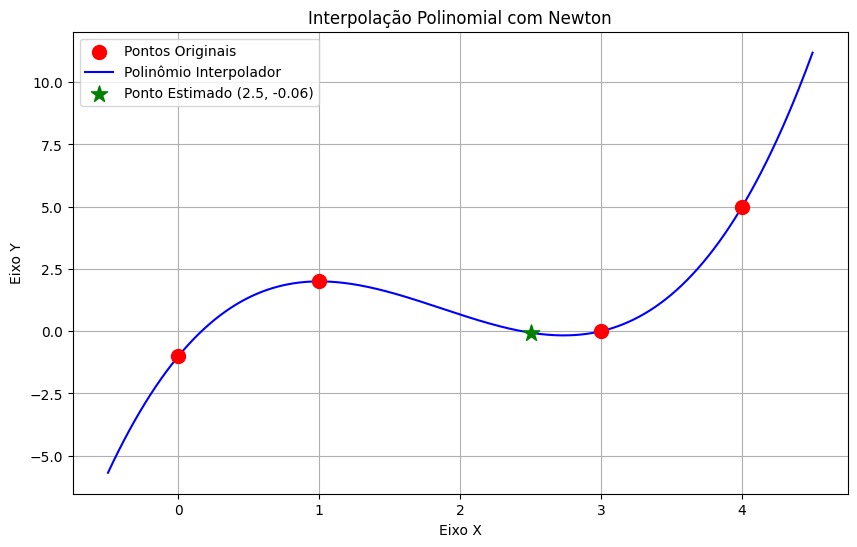

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def newton_coefficients(x_data, y_data):
    """
    Calcula os coeficientes do Polinômio de Newton (diferenças divididas).

    Args:
        x_data (list or np.array): Lista dos pontos x conhecidos.
        y_data (list or np.array): Lista dos pontos y conhecidos.

    Returns:
        np.array: O vetor de coeficientes a0, a1, a2, ...
    """
    n = len(x_data)
    # A tabela de diferenças divididas será armazenada em uma matriz n x n
    # Inicialmente, a primeira coluna é preenchida com os valores de y
    table = np.zeros([n, n])
    table[:, 0] = y_data

    # Itera para preencher o resto da tabela
    for j in range(1, n): # Colunas
        for i in range(n - j): # Linhas
            table[i, j] = (table[i+1, j-1] - table[i, j-1]) / (x_data[i+j] - x_data[i])

    # Os coeficientes são a primeira linha da tabela
    return table[0]

def newton_polynomial_evaluation(coeffs, x_data, x_val):
    """
    Avalia o Polinômio de Newton em um ponto x_val.
    Usa a forma aninhada (método de Horner) para eficiência.

    Args:
        coeffs (np.array): Coeficientes calculados pela função newton_coefficients.
        x_data (list or np.array): Lista dos pontos x originais.
        x_val (float): O ponto x onde queremos estimar o valor de y.

    Returns:
        float: O valor interpolado y_val.
    """
    n = len(coeffs) - 1
    # Começa do último coeficiente e volta
    p = coeffs[n]
    for i in range(n - 1, -1, -1):
        p = p * (x_val - x_data[i]) + coeffs[i]
    return p

# --- Execução Principal ---

# 1. Valores de input fixos no código (mesmos do exemplo de Lagrange)
x_points = np.array([0, 1, 3, 4], dtype=float)
y_points = np.array([-1, 2, 0, 5], dtype=float)

# 2. Ponto onde queremos estimar o valor
x_estimativa = 2.5

# 3. Calcula os coeficientes primeiro
coeffs = newton_coefficients(x_points, y_points)

# 4. Usa os coeficientes para avaliar o polinômio
y_estimativa = newton_polynomial_evaluation(coeffs, x_points, x_estimativa)

print("--- Polinômio Interpolador de Newton ---")
print(f"Coeficientes (Diferenças Divididas): {coeffs}")
print(f"\nO valor interpolado em x = {x_estimativa} é y = {y_estimativa:.6f}")

# 5. Visualização (idêntica à de Lagrange, pois o polinômio é o mesmo)
plt.figure(figsize=(10, 6))
plt.scatter(x_points, y_points, color='red', s=100, zorder=5, label='Pontos Originais')

x_curve = np.linspace(min(x_points) - 0.5, max(x_points) + 0.5, 400)
y_curve = [newton_polynomial_evaluation(coeffs, x_points, x) for x in x_curve]

plt.plot(x_curve, y_curve, color='blue', label='Polinômio Interpolador')
plt.scatter(x_estimativa, y_estimativa, color='green', s=150, marker='*', zorder=5, label=f'Ponto Estimado ({x_estimativa}, {y_estimativa:.2f})')

plt.title('Interpolação Polinomial com Newton')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid(True)
plt.show()

# Regressão/Ajuste de curva

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- ÁREA DE INPUT PARA O EXERCÍCIO ---
# Modifique os valores abaixo de acordo com o problema que você quer resolver.

# 1. Insira os pontos (x, y) do seu exercício.
#    As duas listas devem ter o mesmo número de elementos.
x_dados = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y_dados = np.array([-0.5, 2.1, 3.9, 6.2, 7.8, 10.1, 12.3, 13.9])

# 2. Defina o grau do polinômio para o ajuste.
#    - Para Regressão Linear, use 1.
#    - Para Regressão Quadrática, use 2.
grau_do_polinomio = 1

# --- FIM DA ÁREA DE INPUT ---


def resolver_regressao_com_residuos(x_data, y_data, grau):
    """
    Calcula e exibe a regressão polinomial, incluindo a análise dos resíduos.
    """
    if len(x_data) != len(y_data):
        print("Erro: As listas de dados x e y devem ter o mesmo tamanho.")
        return

    print(f"--- Calculando Regressão Polinomial de Grau {grau} ---")

    # 1. CÁLCULO DOS COEFICIENTES
    coeficientes = np.polyfit(x_data, y_data, grau)

    # 2. CRIAÇÃO DA FUNÇÃO DO MODELO
    modelo_polinomial = np.poly1d(coeficientes)

    # 3. EXIBIÇÃO DA EQUAÇÃO
    equacao = "y = "
    for i, coef in enumerate(coeficientes):
        potencia = grau - i
        if potencia > 1:
            equacao += f"{coef:.4f}x^{potencia} + "
        elif potencia == 1:
            equacao += f"{coef:.4f}x + "
        else:
            equacao += f"{coef:.4f}"
    equacao = equacao.replace("+ -", "- ")

    print("\nCoeficientes encontrados (da maior para a menor potência):")
    print(coeficientes)
    print("\nEquação do modelo de ajuste:")
    print(equacao)

    # 4. CÁLCULO E EXIBIÇÃO DOS RESÍDUOS
    # Calcula os valores de y que o modelo prevê para cada x_dado.
    y_preditos = modelo_polinomial(x_data)
    # O resíduo é a diferença entre o valor real e o valor previsto.
    residuos = y_data - y_preditos
    # A Soma dos Quadrados dos Resíduos (SSR) é uma medida do erro total.
    ssr = np.sum(residuos**2)

    print("\n--- Análise dos Resíduos ---")
    print("Resíduo para cada ponto (y_real - y_predito):")
    # Imprime os resíduos arredondados para melhor leitura.
    print(np.round(residuos, 4))
    print(f"\nSoma dos Quadrados dos Resíduos (SSR): {ssr:.4f}")

    # 5. VISUALIZAÇÃO GRÁFICA
    x_curva = np.linspace(min(x_data) - 0.5, max(x_data) + 0.5, 400)
    y_curva = modelo_polinomial(x_curva)

    plt.figure(figsize=(12, 8))
    plt.scatter(x_data, y_data, color='red', s=80, zorder=5, label='Dados Originais')
    plt.plot(x_curva, y_curva, color='blue', linewidth=2, label=f'Modelo de Ajuste (Grau {grau})')

    # Adiciona as linhas verticais para representar os resíduos
    for i in range(len(x_data)):
        # O label é adicionado apenas uma vez para não poluir a legenda
        label_residuos = 'Resíduos' if i == 0 else ""
        plt.vlines(x=x_data[i], ymin=y_preditos[i], ymax=y_data[i],
                   colors='gray', linestyles='dotted', label=label_residuos)

    plt.title(f'Resultado da Regressão (Grau {grau}) com Resíduos', fontsize=16)
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')
    plt.legend()
    plt.grid(True)
    plt.show()


# --- Execução do programa ---
resolver_regressao_com_residuos(x_dados, y_dados, grau_do_polinomio)